# A Preview of Data Science Tools

# 数据科学工具预览

> If you would like to spring from here and go farther in using Python for scientific computing or data science, there are a few packages that will make your life much easier.
This section will introduce and preview several of the more important ones, and give you an idea of the types of applications they are designed for.
If you're using the *Anaconda* or *Miniconda* environment suggested at the beginning of this report, you can install the relevant packages with the following command:

```
$ conda install numpy scipy pandas matplotlib scikit-learn
```

> Let's take a brief look at each of these in turn.

如果你希望开始使用Python进入科学计算和数据科学的领域，那么有一些第三方包会让你的工作更加轻松。本章将会介绍和预览其中非常重要的几个，通过讨论，你能对他们的应用场景有所了解。如果你在使用*Anaconda*或*Miniconda*环境，你可以在开始之前先安装相关的第三方包：

```shell
$ conda install numpy scipy pandas matplotlib scikit-learn
```

下面我们逐个简单的介绍一下它们。

## NumPy: Numerical Python

## Numpy：Numerical Python

> NumPy provides an efficient way to store and manipulate multi-dimensional dense arrays in Python.
The important features of NumPy are:

> - It provides an ``ndarray`` structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
> - It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

Numpy为Python提供了一个有效的方式来存储和操作多维非稀疏数组。他的重要特性包括：

- 提供`ndarray`结构，能够极为高效的存储和操作向量、矩阵和张量。
- 提供可读性高和简洁的语法来操作这些数据，从简单的元素算术运算到负责的线性代数运算。

> In the simplest case, NumPy arrays look a lot like Python lists.
For example, here is an array containing the range of numbers 1 to 9 (compare this with Python's built-in ``range()``):

在简单的情况下，Numpy的数组很像Python的列表。例如，下面例子是一个数组包括数值范围1到9（可以与Python內建的`range()`比较）：

In [1]:
import numpy as np
x = np.arange(1, 10)
x

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

> NumPy's arrays offer both efficient storage of data, as well as efficient element-wise operations on the data.
For example, to square each element of the array, we can apply the "``**``" operator to the array directly:

Numpy的数组提供了数据的高效存储和元素操作。例如，对每个元素求平方值，只需要简单的将`**`运算符应用到数组上即可。

In [2]:
x ** 2

array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])

> Compare this with the much more verbose Python-style list comprehension for the same result:

如果和Python的列表解析进行比较，结果相同：

In [3]:
[val ** 2 for val in range(1, 10)]

[1, 4, 9, 16, 25, 36, 49, 64, 81]

> Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional.
For example, here we will reshape our ``x`` array into a 3x3 array:

与Python的列表只能是一维的不同，Numpy的数组可以是多维的。例如，我们可以将`x`数组变形为3x3的数组：

In [4]:
M = x.reshape((3, 3))
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

> A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can compute the transpose using ``.T``:

二维数组其实就是一个矩阵，Numpy有很多高效的矩阵运算操作。例如，你可以使用`numpy.T`计算出矩阵的倒置：

In [5]:
M.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

> or a matrix-vector product using ``np.dot``:

或者得到一个矩阵向量的点积，使用`numpy.dot`：

In [6]:
np.dot(M, [5, 6, 7])

array([ 38,  92, 146])

> and even more sophisticated operations like eigenvalue decomposition:

还有更加复杂的操作如特征值分解：

In [7]:
np.linalg.eigvals(M)

array([ 1.61168440e+01, -1.11684397e+00, -9.75918483e-16])

> Such linear algebraic manipulation underpins much of modern data analysis, particularly when it comes to the fields of machine learning and data mining.

这样的线性代数运算是大多数现代数据分析的基础，特别是当你使用机器学习和数据挖掘的时候。

> For more information on NumPy, see [Resources for Further Learning](16-Further-Resources.ipynb).

要获得更多有关Numpy的资源，参见[后续学习资源](16-Further-Resources.ipynb)。

## Pandas: Labeled Column-oriented Data

## Pandas：标签化的基于列的数据

> Pandas is a much newer package than NumPy, and is in fact built on top of it.
What Pandas provides is a labeled interface to multi-dimensional data, in the form of a DataFrame object that will feel very familiar to users of R and related languages.
DataFrames in Pandas look something like this:

Pandas较Numpy而言是一个比较新的包，实际上Pandas是以Numpy为基础构建的。Pandas提供的是一个多维的标签化的数据接口，抽象出来的DataFrame对象对于其他使用R或者相关语言的用户来说会非常熟悉。Pandas中的DataFrame就像这样：

In [8]:
import pandas as pd
df = pd.DataFrame({'label': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'value': [1, 2, 3, 4, 5, 6]})
df

,label,value
0,A,1
1,B,2
2,C,3
3,A,4
4,B,5
5,C,6


> The Pandas interface allows you to do things like select columns by name:

然后Pandas允许使用列名来选择数据：

In [9]:
df['label']

0    A
1    B
2    C
3    A
4    B
5    C
Name: label, dtype: object

> Apply string operations across string entries:

对字符串的列使用字符串操作：

In [10]:
df['label'].str.lower()

0    a
1    b
2    c
3    a
4    b
5    c
Name: label, dtype: object

> Apply aggregates across numerical entries:

对数值型的列使用聚合操作：

In [11]:
df['value'].sum()

21

> And, perhaps most importantly, do efficient database-style joins and groupings:

还有最重要的是，对数据库风格的连接和分组进行有效的计算：

In [12]:
df.groupby('label').sum()

,value
label,
A,5
B,7
C,9


> Here in one line we have computed the sum of all objects sharing the same label, something that is much more verbose (and much less efficient) using tools provided in Numpy and core Python.

我们只用了一行代码就计算了所有相同标签`label`的总和，这在Numpy和Python当中都没有这么简明并且没有这么高效。

> For more information on using Pandas, see [Resources for Further Learning](16-Further-Resources.ipynb).

要获得更多有关Pandas的资源，参见[后续学习资源](16-Further-Resources.ipynb)。

## Matplotlib MatLab-style scientific visualization

## Matplotlib：MatLab风格的科学图表

> Matplotlib is currently the most popular scientific visualization packages in Python.
Even proponents admit that its interface is sometimes overly verbose, but it is a powerful library for creating a large range of plots.

Matplotlib是目前Python中最流行的科学图表展示包。甚至它的支持者都认为它的接口有时候太冗长了，但是它依然是一个创建图表展示的强大工具库。

> To use Matplotlib, we can start by enabling the notebook mode (for use in the Jupyter notebook) and then importing the package as ``plt``"

要在Jupyter notebook里面使用Matplotlib，你可以激活它的notebook模式，然后将这个模块载入：

In [13]:
# 在Jupyter notebook下面激活Matplotlib的notebook模式
%matplotlib notebook

In [14]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # 将图表的风格设置为R语言中的ggplot风格

> Now let's create some data (as NumPy arrays, of course) and plot the results:

现在我们创建一些数据（当然是使用Numpy数组）然后展示图表结果：

<IPython.core.display.Javascript object>


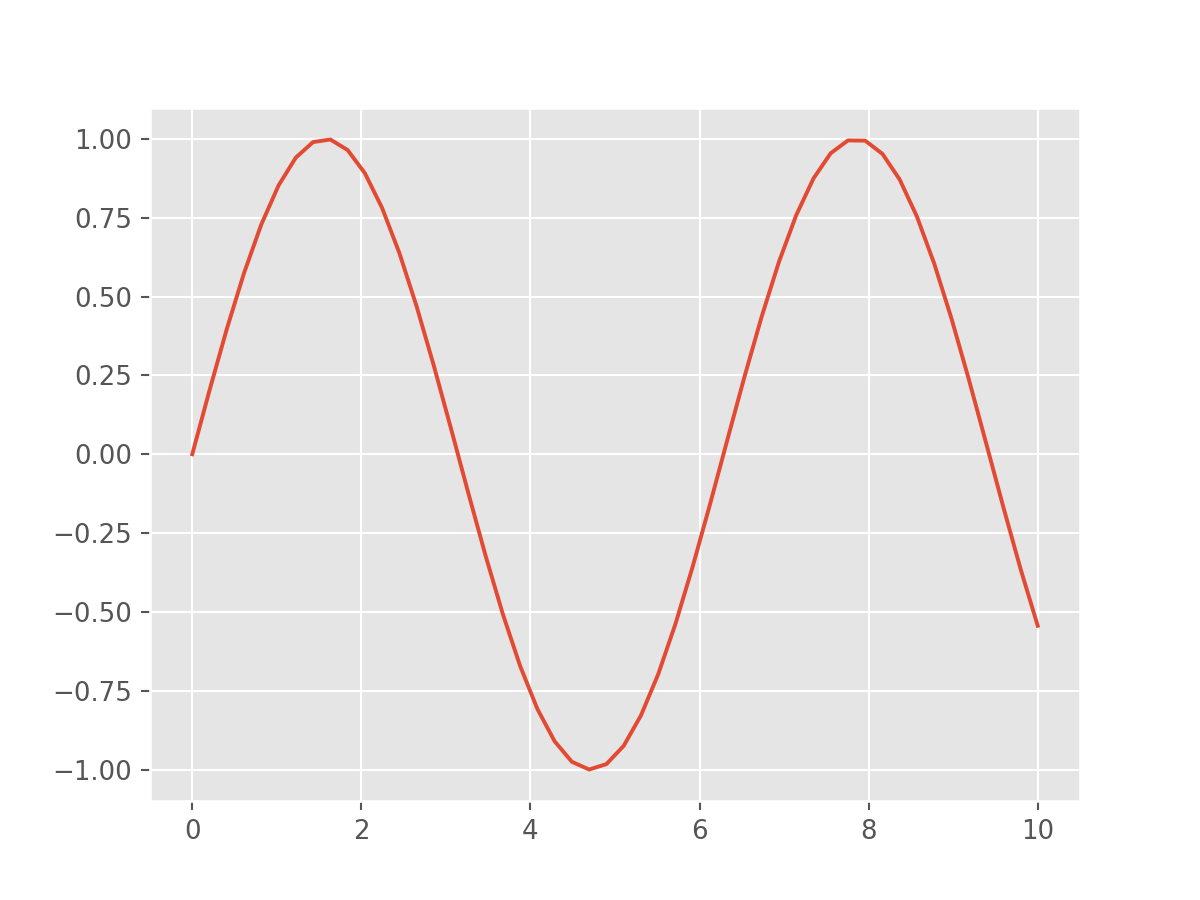

In [15]:
x = np.linspace(0, 10)  # x为均分0-10的区间
y = np.sin(x)           # y为x的正弦值
plt.plot(x, y);         # 以线条展示图形

> If you run this code live, you will see an interactive plot that lets you pan, zoom, and scroll to explore the data.

如果你执行这个代码，你会看到一个交互式的图表展示在你的屏幕上，这个图表允许你平移、缩放、滚动来查看数据。

> This is the simplest example of a Matplotlib plot; for ideas on the wide range of plot types available, see [Matplotlib's online gallery](http://matplotlib.org/gallery.html) as well as other references listed in [Resources for Further Learning](16-Further-Resources.ipynb).

这是Matplotlib图表的一个最最简单的例子；如果你想知道哪些图表类型可用，参见[Matplotlib在线图库](http://matplotlib.org/gallery.html) 还有其他的很多资源可以参看[后续学习资源](16-Further-Resources.ipynb)。 

## SciPy: Scientific Python

## SciPy：Python科学库

> SciPy is a collection of scientific functionality that is built on NumPy.
The package began as a set of Python wrappers to well-known Fortran libraries for numerical computing, and has grown from there.
The package is arranged as a set of submodules, each implementing some class of numerical algorithms.
Here is an incomplete sample of some of the more important ones for data science:

> - ``scipy.fftpack``: Fast Fourier transforms
> - ``scipy.integrate``: Numerical integration
> - ``scipy.interpolate``: Numerical interpolation
> - ``scipy.linalg``: Linear algebra routines
> - ``scipy.optimize``: Numerical optimization of functions
> - ``scipy.sparse``: Sparse matrix storage and linear algebra
> - ``scipy.stats``: Statistical analysis routines

SciPy是一整套科学的功能库，它同样也构建在Numpy之上。这个包首先封装了很多有名的Fortran数值计算库，并且进行了很多扩展。SciPy有很多的子模块，每个子模块实现一类数值算法。下面列出部分重要的子模块机器描述：

- ``scipy.fftpack``: 快速傅里叶变换
- ``scipy.integrate``: 数值积分
- ``scipy.interpolate``: 数值插补
- ``scipy.linalg``: 线性代数
- ``scipy.optimize``: 函数的数值优化
- ``scipy.sparse``: 稀疏矩阵存储和线性代数
- ``scipy.stats``: 统计分析

> For example, let's take a look at interpolating a smooth curve between some data

例如，我们看看在数据之中进行插补形成光滑的曲线：

<IPython.core.display.Javascript object>


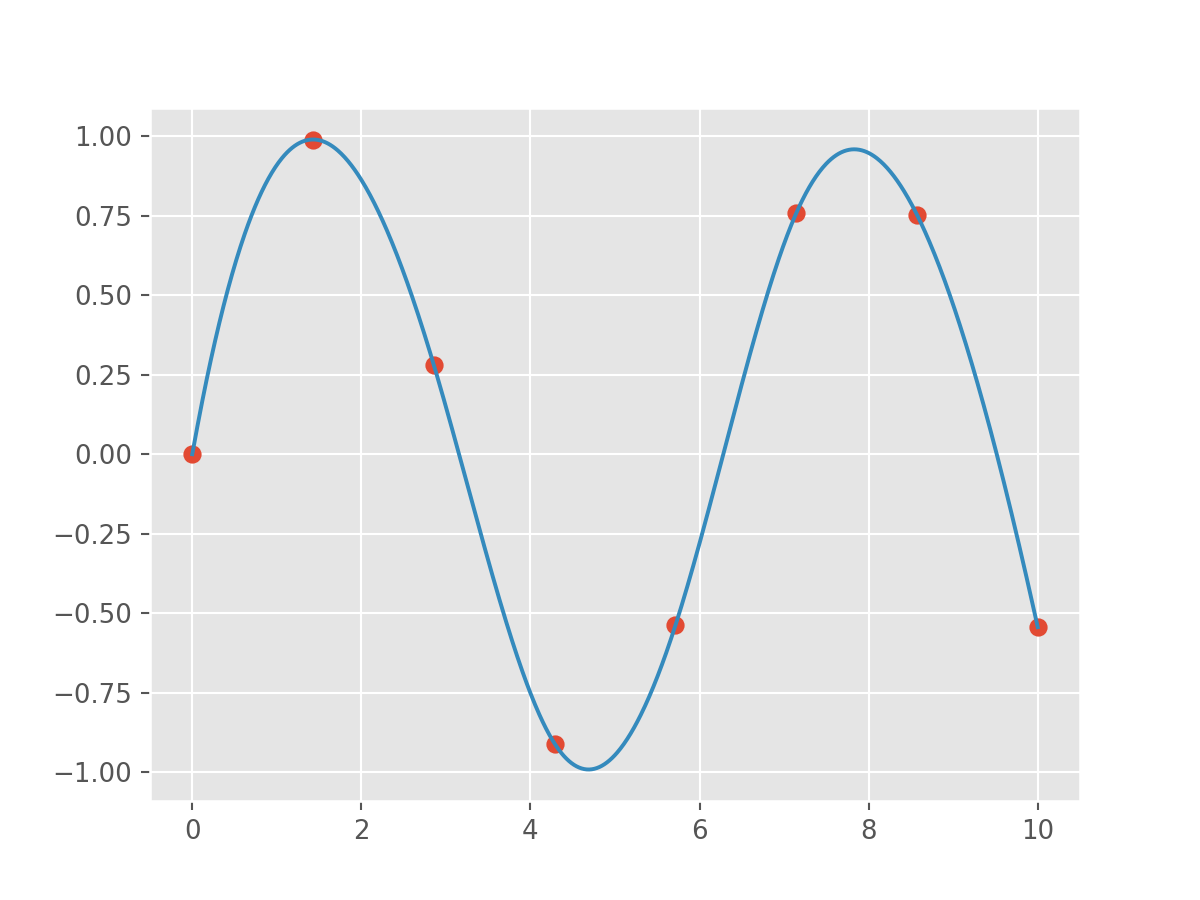

In [16]:
from scipy import interpolate

# x为均分0-10区间，共8个点
x = np.linspace(0, 10, 8)
y = np.sin(x)  # y为x的正弦值

# 构建立方插值函数
func = interpolate.interp1d(x, y, kind='cubic')

# 在0-10区间插入1000个点
x_interp = np.linspace(0, 10, 1000)
y_interp = func(x_interp)

# 在Matplotlib上描绘图表
plt.figure()  # 创建新图表
plt.plot(x, y, 'o')  # 原始值用圆点表示
plt.plot(x_interp, y_interp);  # 绘制插补的值

> What we see is a smooth interpolation between the points.

我们在屏幕上将会看到一条经过插值后形成的光滑的曲线。

## Other Data Science Packages

## 其他数据科学包

> Built on top of these tools are a host of other data science packages, including general tools like [Scikit-Learn](http://scikit-learn.org) for machine learning, [Scikit-Image](http://scikit-image.org) for image analysis, and [Statsmodels](http://statsmodels.sourceforge.net/) for statistical modeling, as well as more domain-specific packages like [AstroPy](http://astropy.org) for astronomy and astrophysics, [NiPy](http://nipy.org/) for neuro-imaging, and many, many more.

在上面介绍的这几个包的基础上，还有很多基于它们构建出来的包，包括机器学习的通用工具[Scikit-Learn](http://scikit-learn.org)，图像分析工具[Scikit-Image](http://scikit-image.org)，统计建模工具[Statsmodels](http://statsmodels.sourceforge.net/)，以及非常专业领域的天体物理学工具[AstroPy](http://astropy.org)和神经影像领域的[NiPy](http://nipy.org/)，等等。

> No matter what type of scientific, numerical, or statistical problem you are facing, it's likely there is a Python package out there that can help you solve it.

无论你要解决的是哪一类的科学、数值计算或统计学问题，似乎Python都已经有现成的第三方包准备好帮助你解决它们了。